In [1]:
from model.model import *
from preprocess import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [4]:
dfs = preprocess(alldat)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [5]:
train, test = train_test_split(dfs)

In [14]:
df = train
df.columns

Index(['session', 'session_type', 'mouse_name', 'trial_number', 'trial_type',
       'go_trial', 'stim_loc', 'ideal_resp', 'gocue', 'response_time',
       'latency', 'mouse_resp', 'wheel_velocity', 'wheel_acceleration',
       'feedback_onset', 'feedback_type', 'contrast_left', 'contrast_right',
       'contrast_diff', 'pres_difficulty', 'pres_acc', 'past_acc',
       'past_latency', 'past_difficulty', 'past_trial_type', 'fut_acc',
       'fut_latency', 'fut_difficulty', 'fut_trial_type'],
      dtype='object')

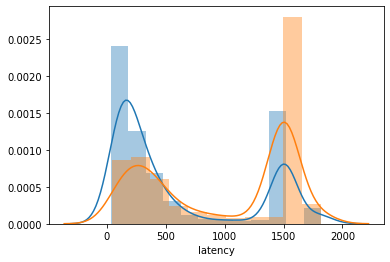

In [15]:
import seaborn as sns
sns.distplot(df[df['feedback_type'] == 1]['latency'], label='reward',norm_hist=True)
sns.distplot(df[df['feedback_type'] == -1]['latency'], label='no reward',norm_hist=True)

In [7]:
# # Define Mode
# df['mode'] = 0

# # Split Modes
# less_25 = df['latency'] < .25
# less_50 = df['latency'] <= .5
# greater_25 = df['latency'] >= .25

# df['mode'][less_25] = 1
# df['mode'][less_50 & greater_25] = 2

In [96]:
import seaborn as sns

def create_histogram(df, measure='latency',feedback_type=None,split_fig=None,split_sub=None,split_plot='feedback_type',remove_nogo=True):
    
    # Check to remove no go
    if remove_nogo:
        df = df[df['trial_type'] != "E"]
        
    # Check to remove feedback types
    if feedback_type is not None:
        if feedback_type is -1 or 1:
            df = df[df['feedback_type'] == feedback_type]  
            if feedback_type == -1:
                appended_label = "No Reward Trials Only"
            if feedback_type == 1:
                appended_label = "Reward Trials Only"  
                
    df = df.dropna(subset=['pres_difficulty'])
    
    # Pull out all unique figure distinctions 
    if split_fig is not None:
        split_fig_list = sorted(set(df[split_fig]))
    else:
        split_fig_list = ['collapse']
        
    # Pull out all unique subfigure distinctions 
    if split_sub is not None:
        split_sub_list = sorted(set(df[split_sub]))
    else:
        split_sub_list = ['collapse']
    
    # Pull out all unique subplot distinctions 
    if split_plot is not None:
        split_plot_list = sorted(set(df[split_plot]))
    else:
        split_plot_list = ['collapse']
    
    # Plot each figure, subfigure, and plot combination
    for fig_ind,fig in enumerate(split_fig_list):
        plt.figure(fig_ind,figsize=(20,20));
        if fig is not 'collapse':
            df_fig = df[df[split_fig] == fig]
        else:
            df_fig = df
        for sub_ind,sub in enumerate(split_sub_list):
            plt.subplot(np.ceil(np.sqrt(len(split_sub_list))), np.ceil(np.sqrt(len(split_sub_list))), sub_ind+1)
            if sub is not 'collapse':
                df_sub = df_fig[df_fig[split_sub] == sub]
            else:
                df_sub = df_fig
            for plot_ind,plot in enumerate(split_plot_list):
                if plot is not 'collapse':
                    df_plot = df_sub[df_sub[split_plot]==plot]
                else:
                    df_plot = df_sub
                sns.distplot(df_plot[measure], label=split_plot + ' ' + str(plot_ind),norm_hist=True)
                plt.title(str(split_sub) + ' = ' + str(sub))
            plt.legend()
            plt.xlim([-500,2000])
        plt.suptitle(str(fig),fontweight='bold', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

    return df_plot

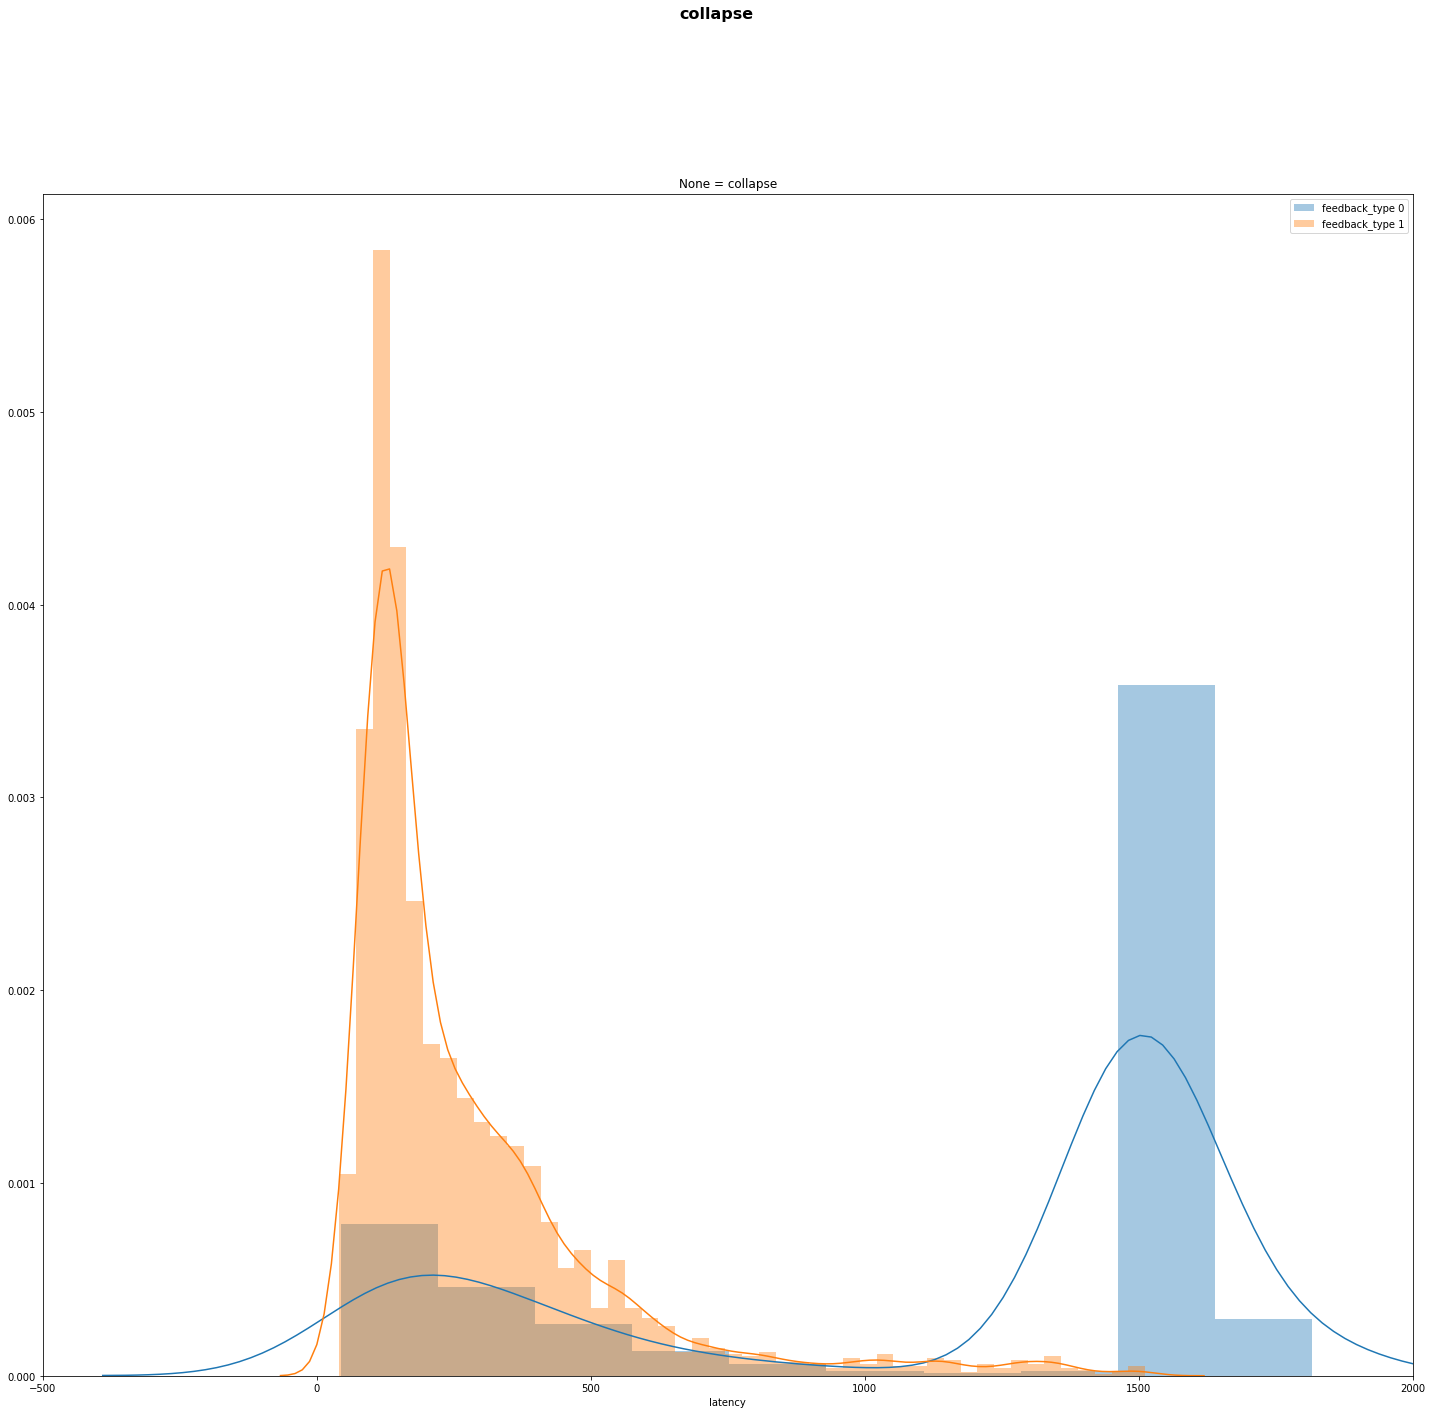

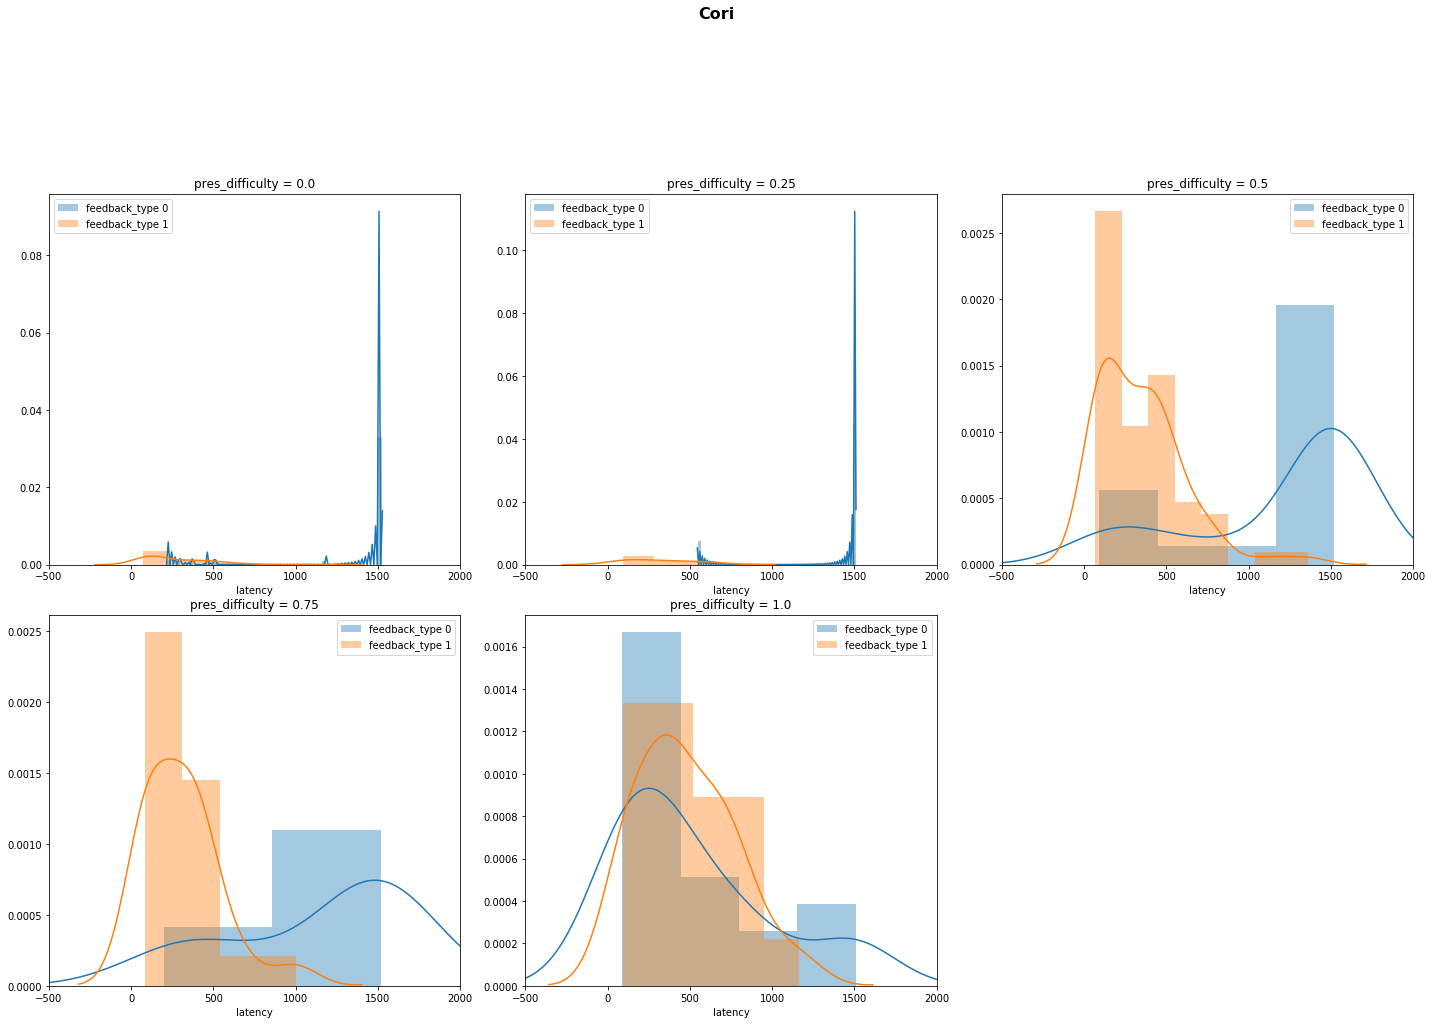

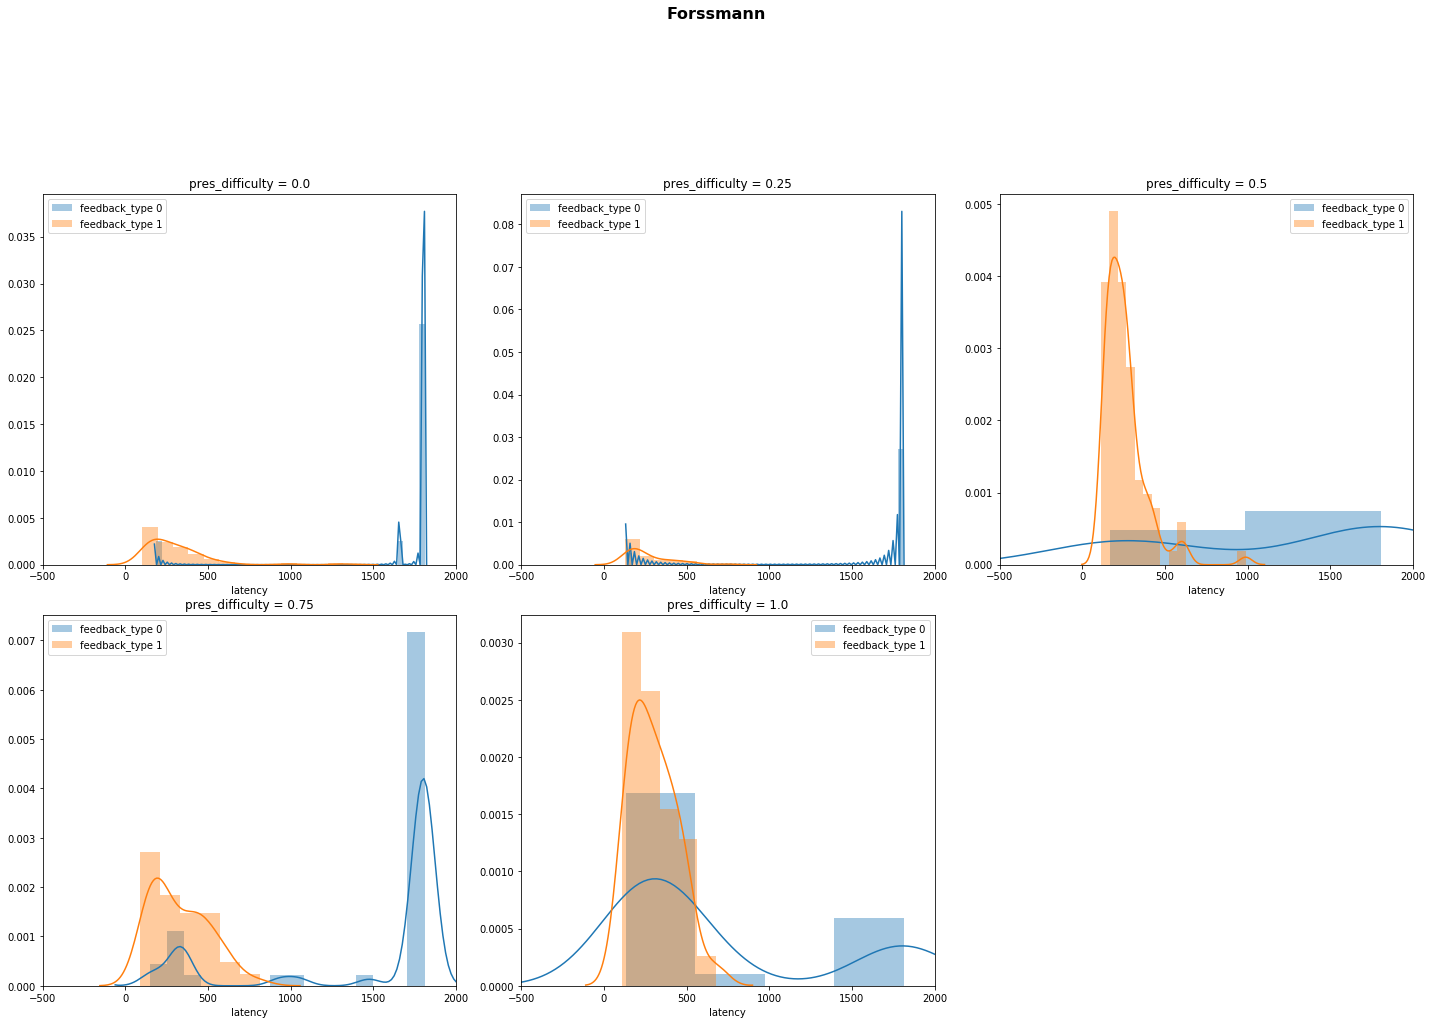

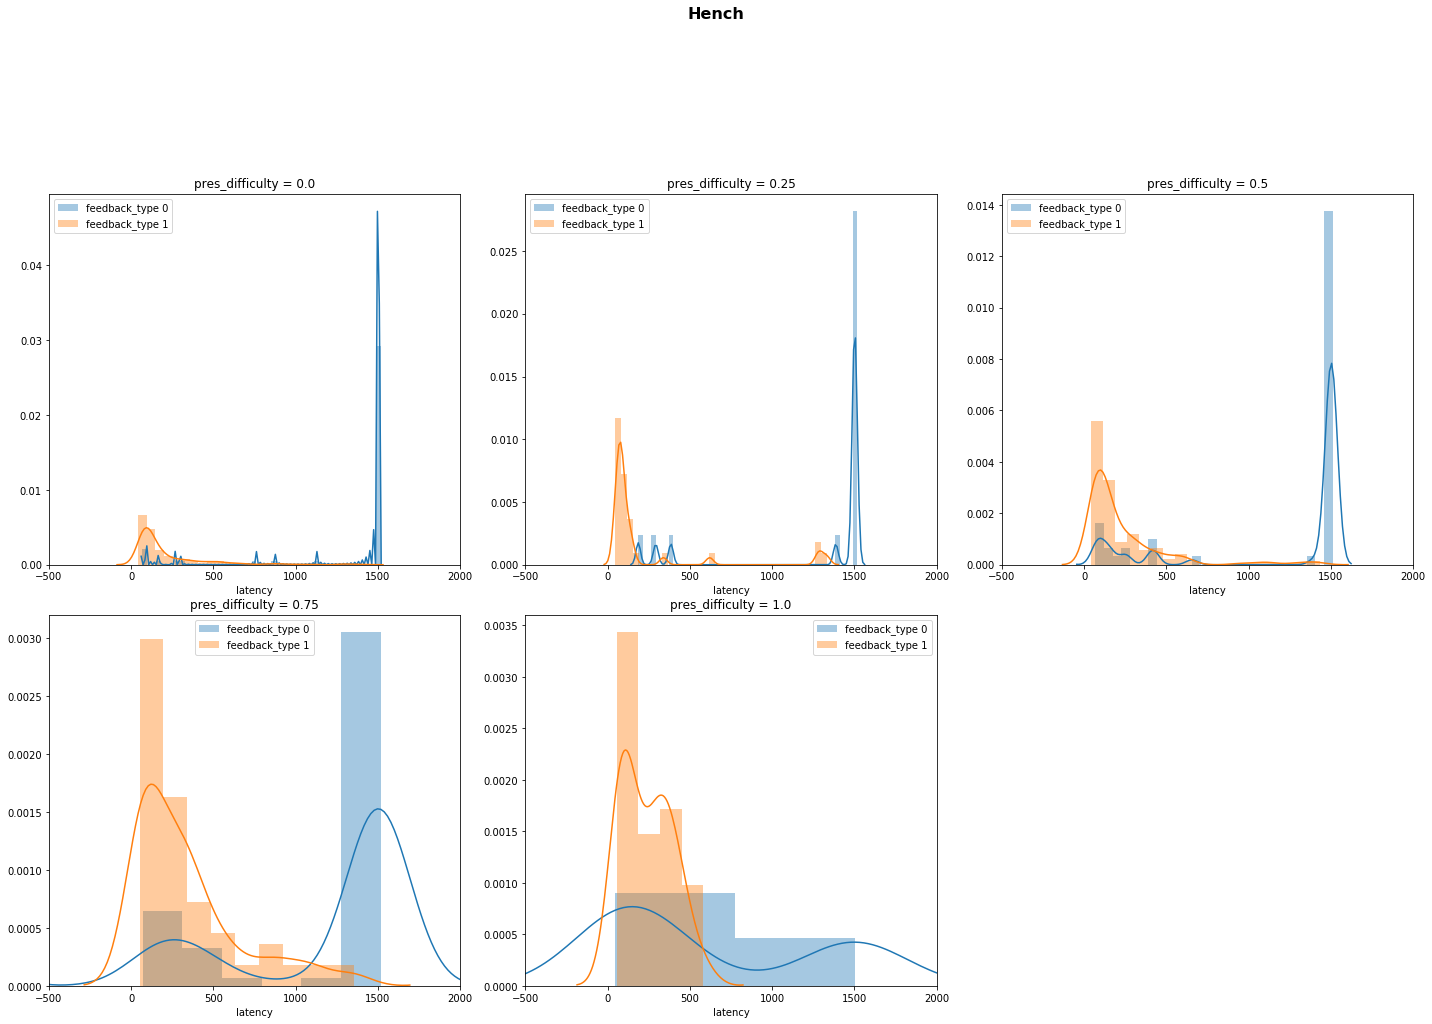

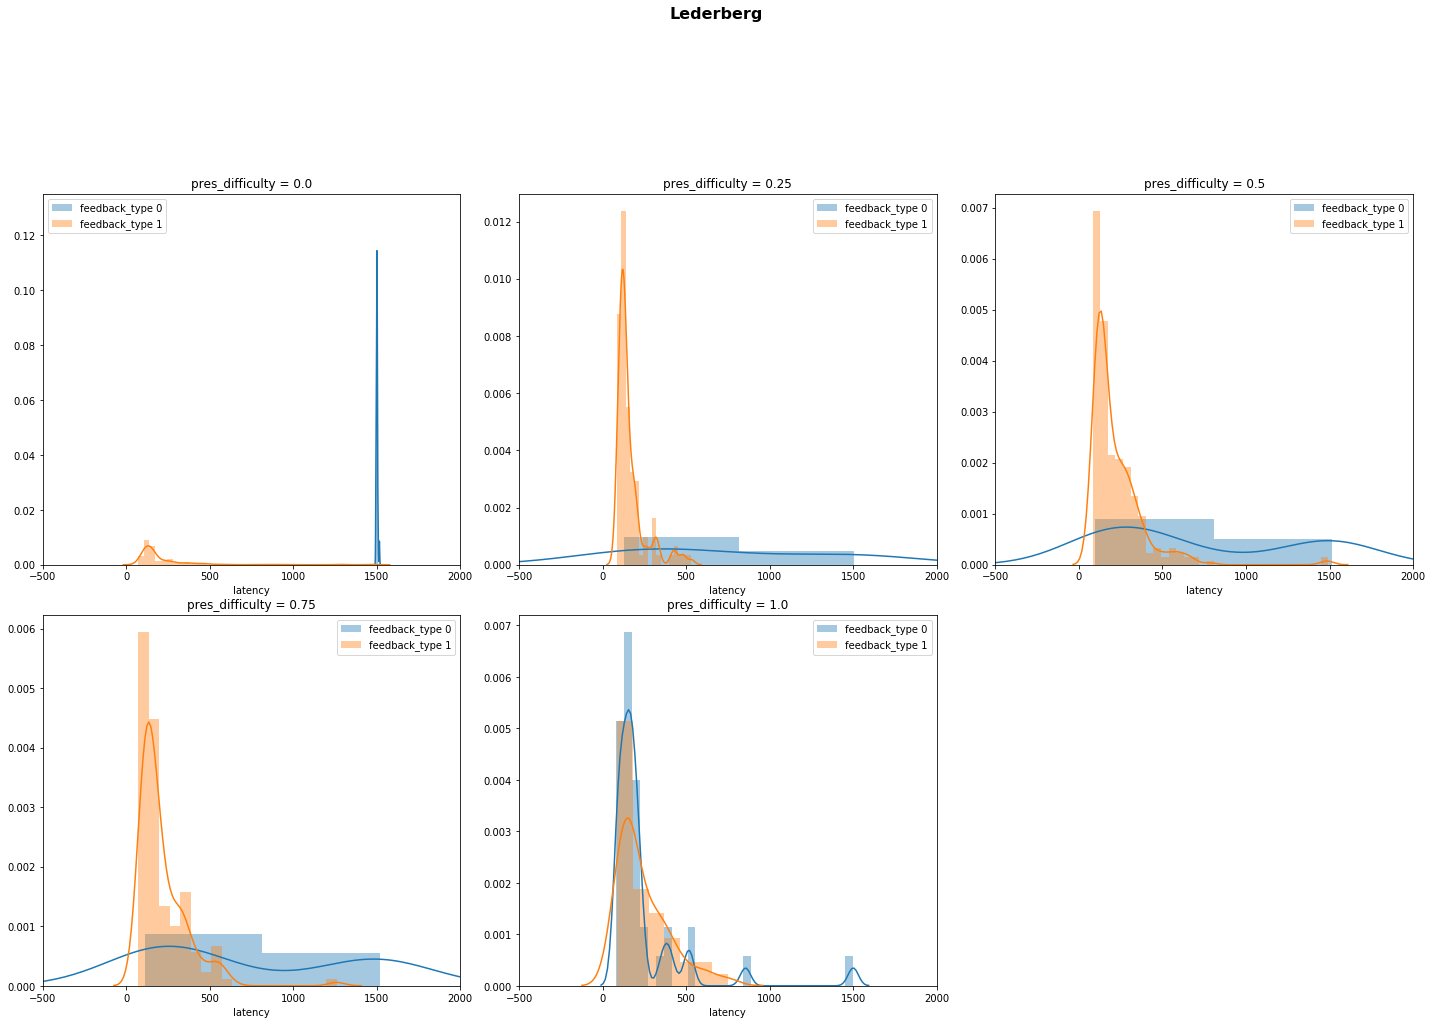

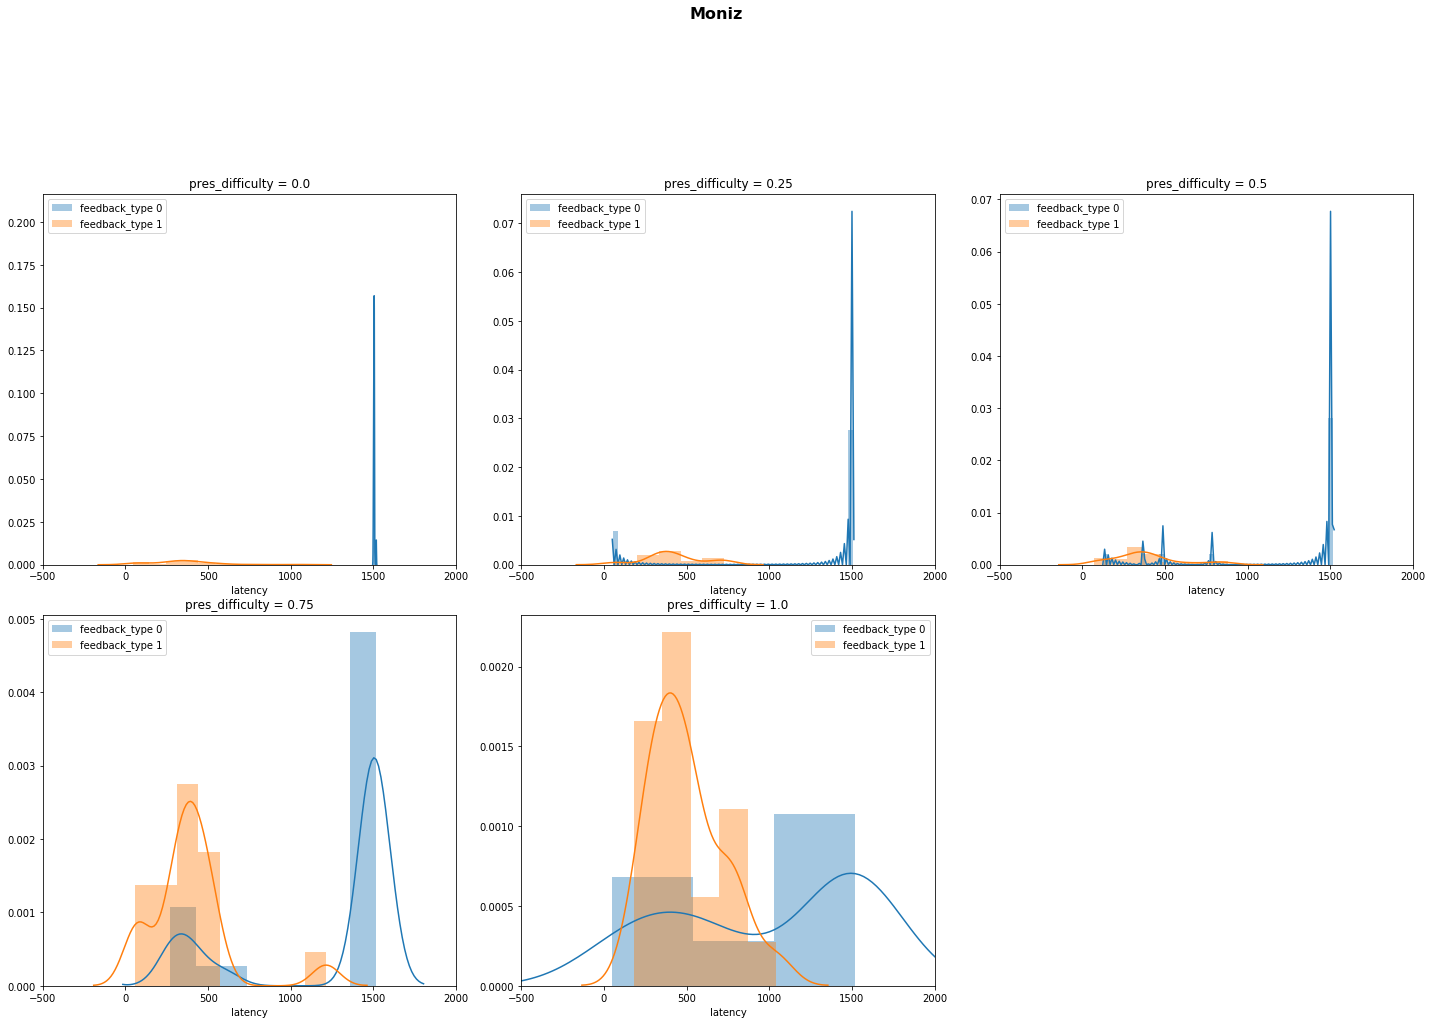

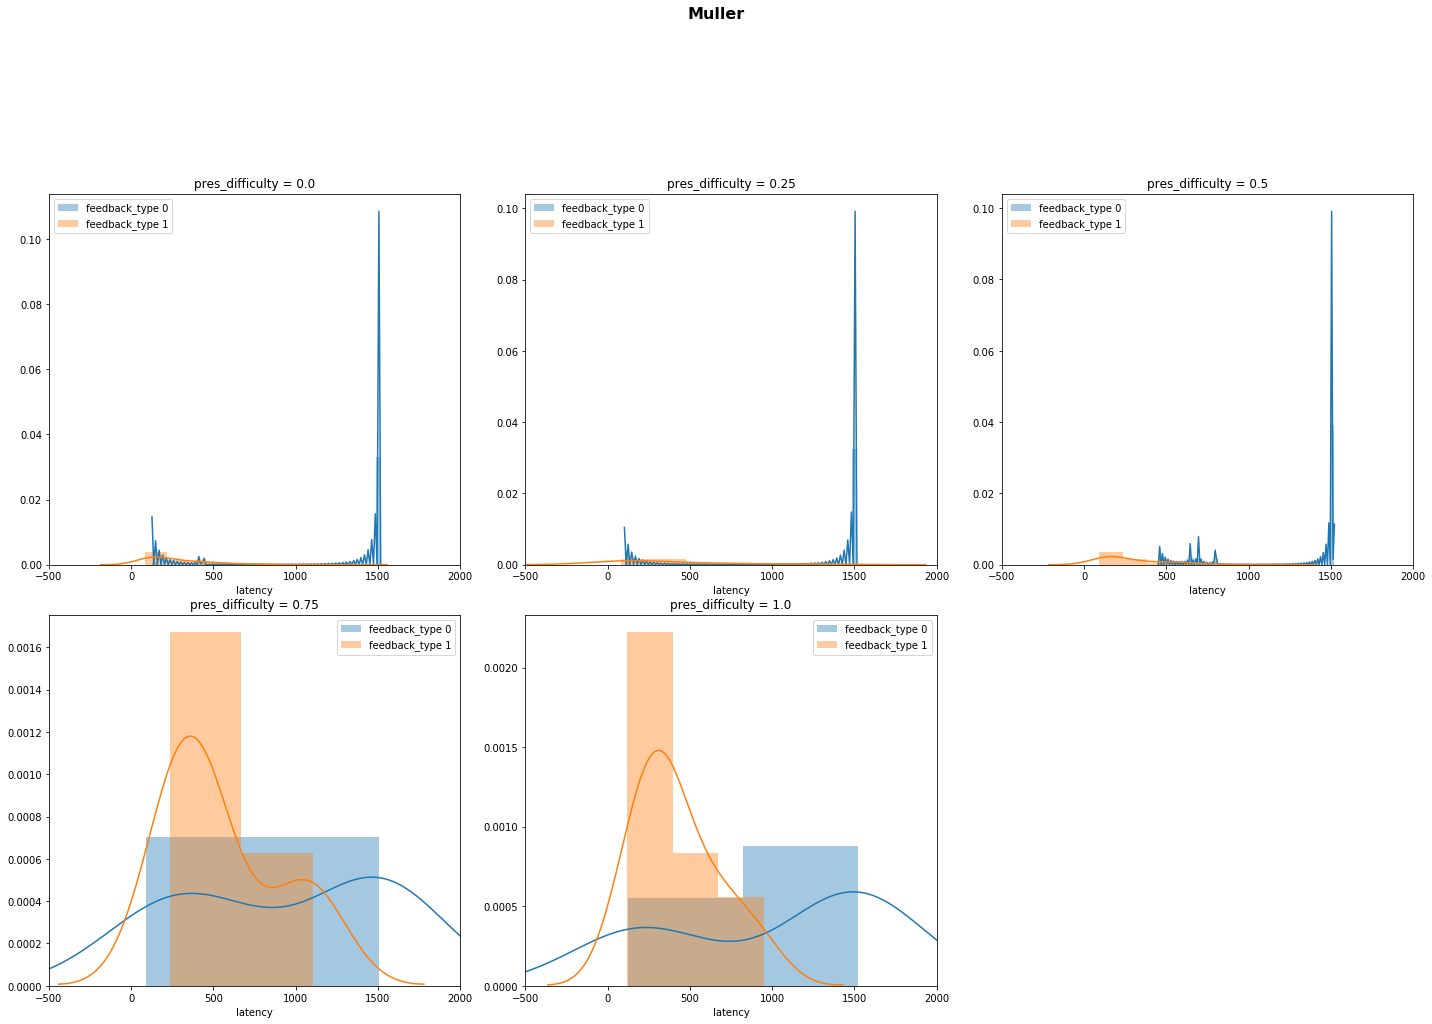

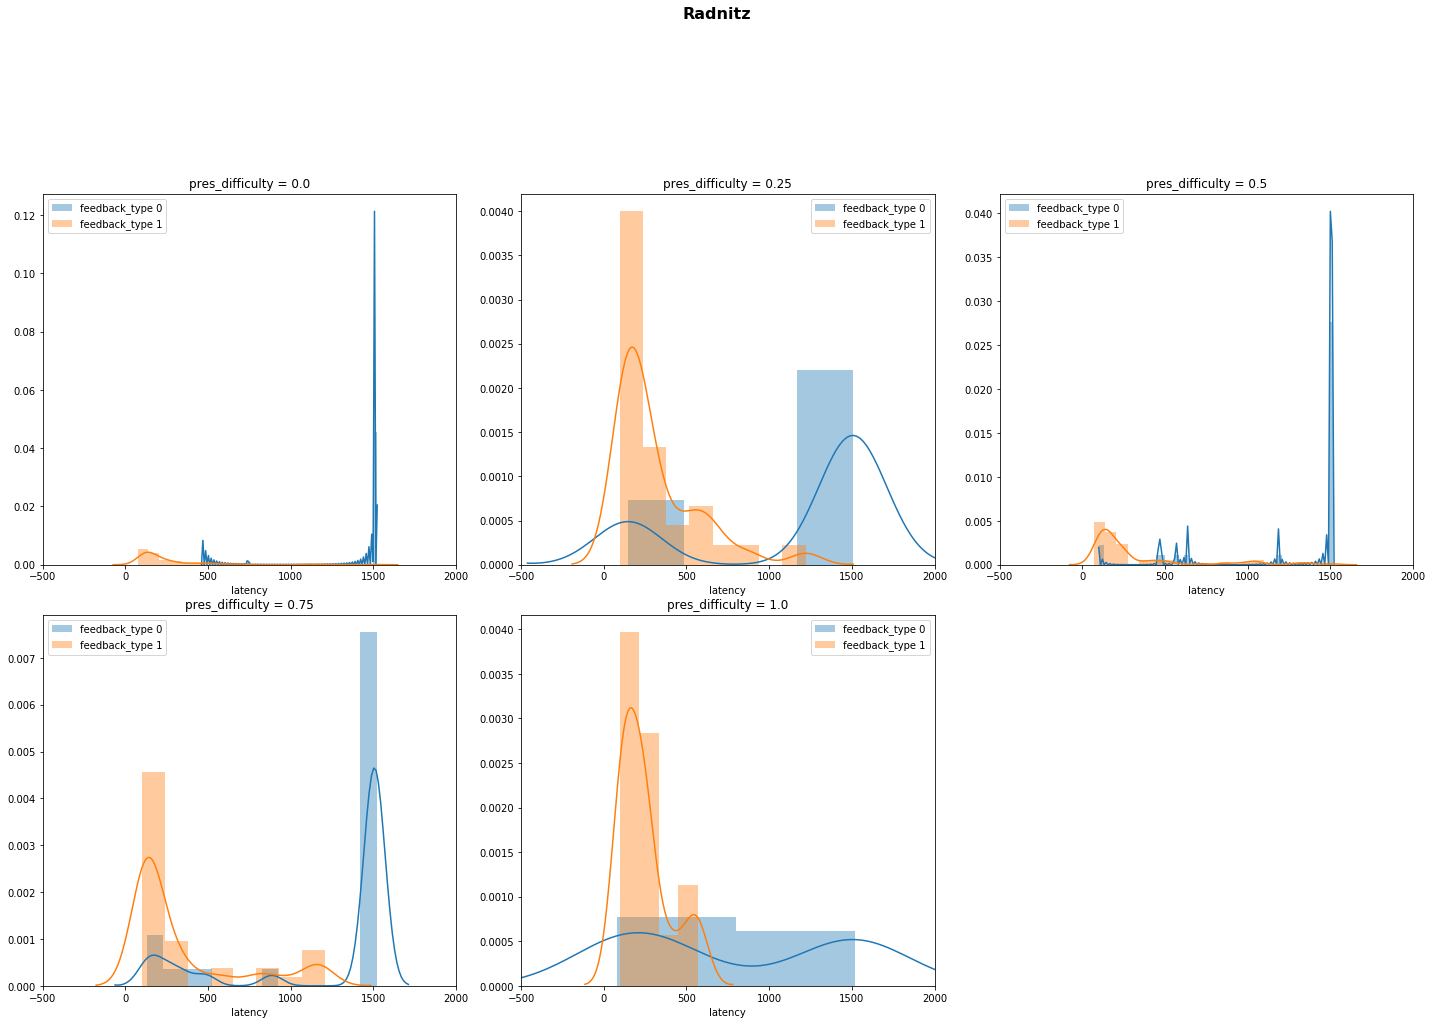

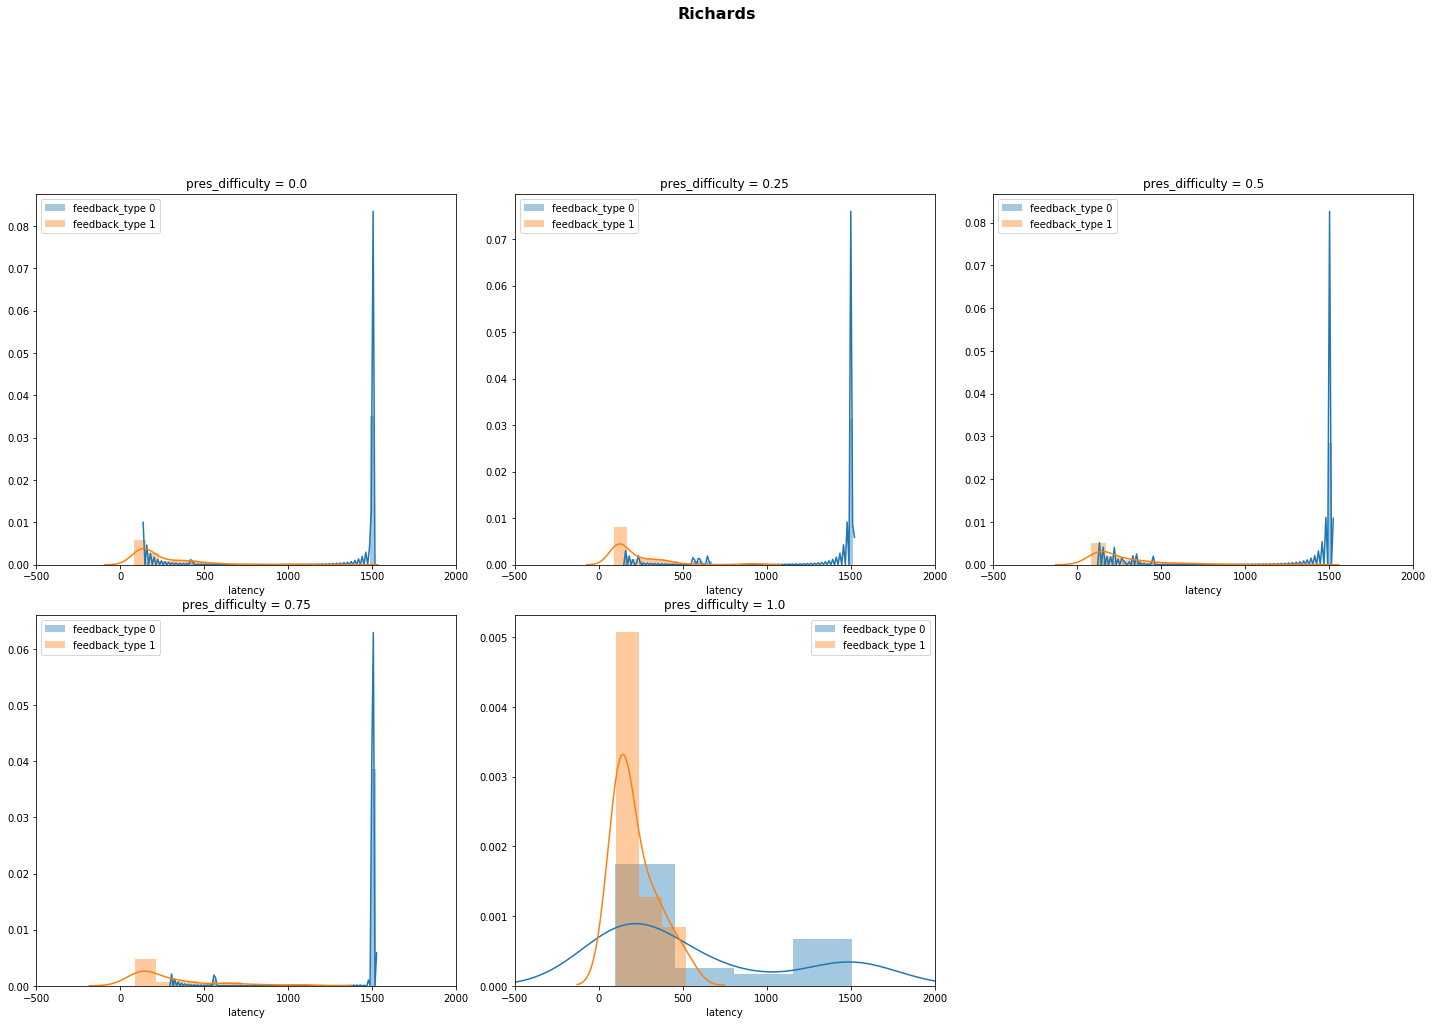

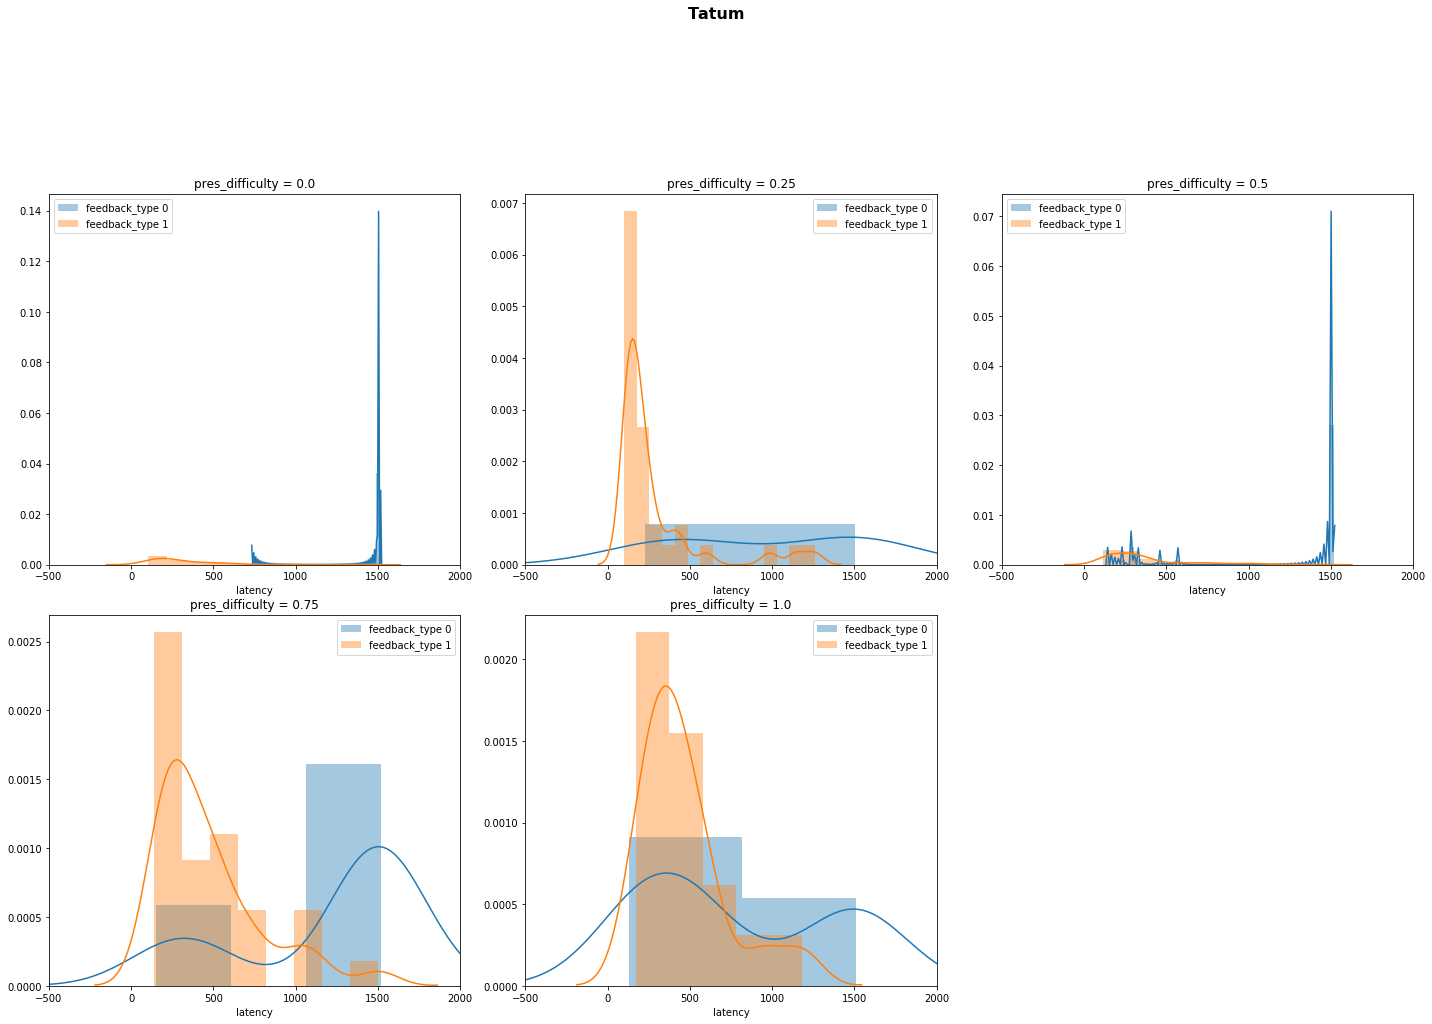

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-pack

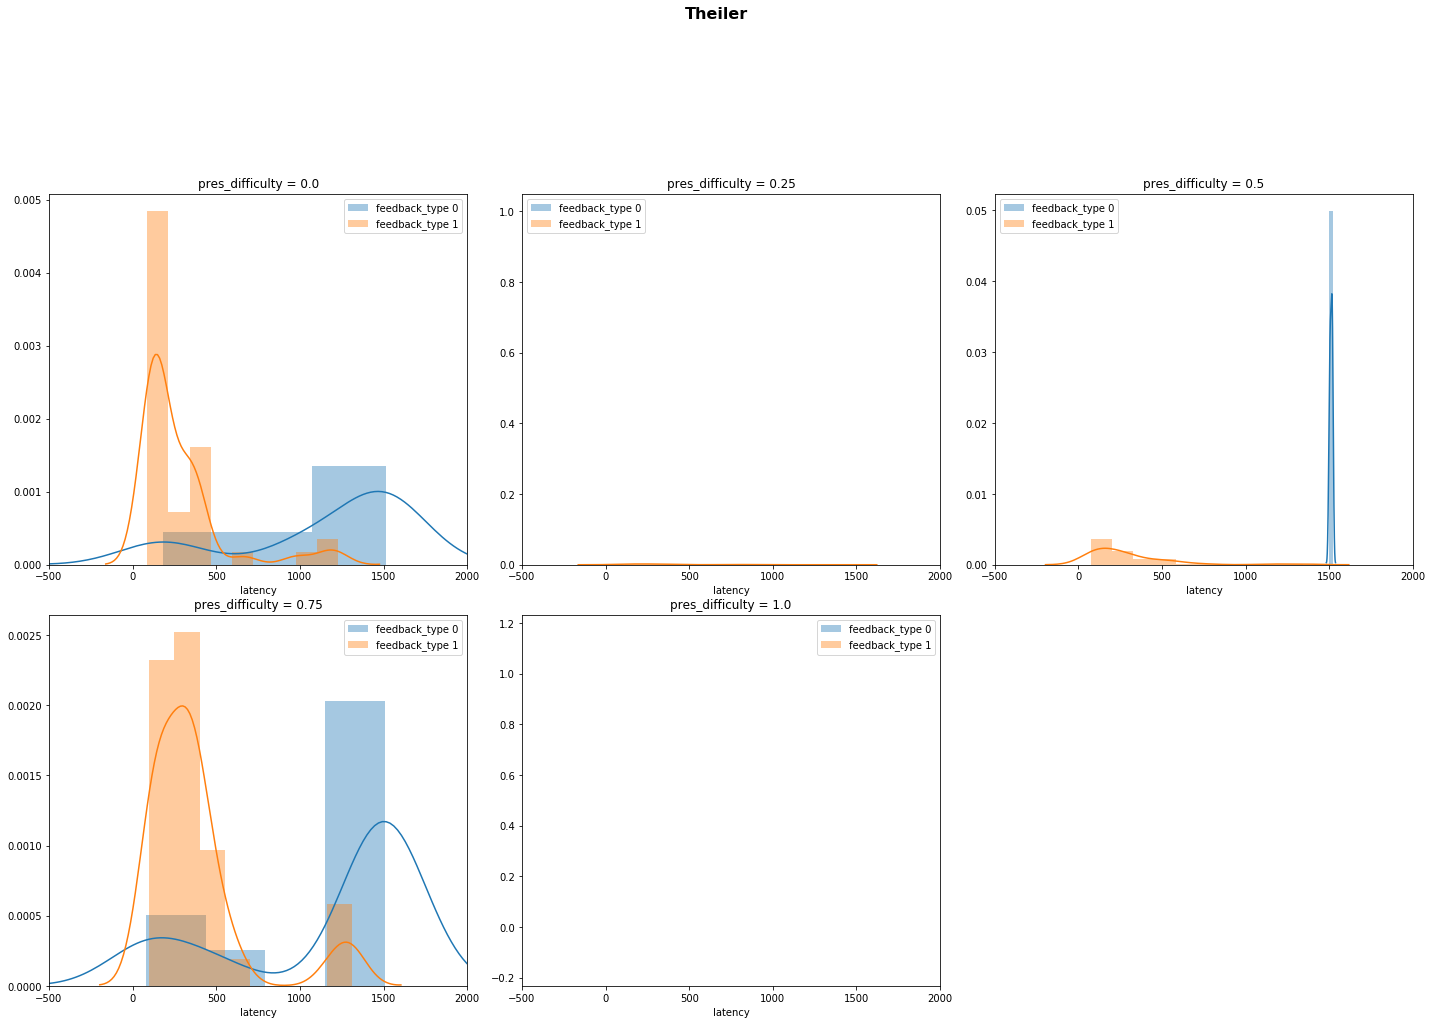

,session,session_type,mouse_name,trial_number,trial_type,go_trial,stim_loc,ideal_resp,gocue,response_time,...,pres_difficulty,pres_acc,past_acc,past_latency,past_difficulty,past_trial_type,fut_acc,fut_latency,fut_difficulty,fut_trial_type


In [98]:
# Plot latency (with no separations)
df_plot = create_histogram(df)
create_histogram(df,split_fig='mouse_name',split_sub='pres_difficulty')